<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [117]:
%load_ext autoreload
%autoreload 2

import torchvision

from model import BarlowTwins, Transform

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ToTensor()

In [92]:
Transform().transform

Compose(
    Grayscale(num_output_channels=3)
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bicubic)
    RandomHorizontalFlip(p=0.5)
    RandomApply(
    p=0.8
    ColorJitter(brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.8, 1.2], hue=[-0.1, 0.1])
)
    RandomGrayscale(p=0.2)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [181]:
dataset = torchvision.datasets.CIFAR10(
  './data/', 
  train=True, 
  download=True,
  transform=transforms.Compose([transforms.ToTensor()])
#   transform=Transform()
  )

loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    num_workers=1,
    pin_memory=True,
#     sampler=sampler,
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data/


In [106]:
from dataclasses import dataclass

@dataclass
class Config:
    model='resnet50'
    proj_dim=100
    proj_layers=2
    batch_size=2
    lambda_=0.1
    pretrained=True

In [118]:
model = BarlowTwins(Config)

In [120]:
import time
from tqdm.auto import tqdm 

start_time = time.time()
scaler = torch.cuda.amp.GradScaler()
for epoch in range(0, 1):
#     sampler.set_epoch(epoch)
    for step, ((y1, y2), _) in tqdm(enumerate(loader, start=epoch * len(loader))):
#         y1 = y1.cuda(gpu, non_blocking=True)
#         y2 = y2.cuda(gpu, non_blocking=True)
#         adjust_learning_rate(args, optimizer, loader, step)
#         optimizer.zero_grad()
        with torch.cuda.amp.autocast():
            loss = model.forward(y1, y2)
        scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [63]:
mask = torch.ones(3, 3, dtype=torch.float32) - torch.eye(3, dtype=torch.float32)
torch.arange(0, 9, 1).view(3,3).mul(mask)

tensor([[0., 1., 2.],
        [3., 0., 5.],
        [6., 7., 0.]])

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision

import matplotlib.pyplot as plt

In [215]:
torch.backends.cudnn.enabled = False
torch.manual_seed(123)

mnist_transform = torchvision.transforms.Compose([
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize((0.1307,), (0.3081,))
  ])

train_data = torchvision.datasets.MNIST(
  './data/', 
  train=True, 
  download=True,
  transform=mnist_transform
  )

test_data = torchvision.datasets.MNIST(
  './data/', 
  train=False, 
  download=True,
  transform=mnist_transform
  )

train_loader = torch.utils.data.DataLoader(
  train_data,
  batch_size=4, 
  shuffle=True
  )

test_loader = torch.utils.data.DataLoader(
  test_data,
  batch_size=2, 
  shuffle=False
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



KeyboardInterrupt: 

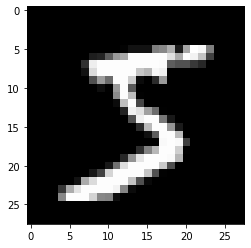

In [6]:
images, labels = train_data[0]
plt.imshow(images.reshape(28, 28), cmap='gray')


In [7]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [11]:
from torchvision import transforms

In [121]:
tfm

RandomResizedCropAndInterpolation(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)

In [182]:
import random
from timm.data.auto_augment import rand_augment_transform
tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={'img_mean': (124, 116, 104)}
)

class Augmenter:
    def __init__(self, tfm):
        self.tfm_a = tfm
        self.tfm_b = tfm
    
    def __call__(self, x):
    
        x1 = self.tfm_a(x)
        x2 = self.tfm_b(x)
        return x1, x2

In [183]:
aug = Augmenter(tfm)

In [184]:
batch = next(iter(loader))

In [185]:
toImg = transforms.ToPILImage()

In [186]:
img_tensor = batch[0][0][1,:]

In [194]:
Image.BILINEAR

2

In [202]:
from timm.data import create_dataset
ds = create_dataset('torch/cifar10', 'cifar10', download=True, split='train[:5%]')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting cifar10/cifar-10-python.tar.gz to cifar10


In [204]:
img, label = ds[0]

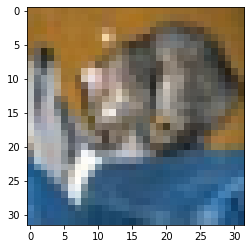

In [205]:

plt.imshow(img)

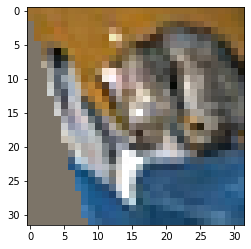

In [214]:
plt.imshow(tfm(img))

In [198]:
aug(toImg(img_tensor))

TypeError: color must be int or single-element tuple

In [126]:
RandomResizedCropAndInterpolation??

In [44]:
tfm

RandAugment(n=2, ops=
	AugmentOp(name=AutoContrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Equalize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Invert, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Rotate, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Posterize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Solarize, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=SolarizeAdd, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Color, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Contrast, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Brightness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=Sharpness, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearX, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=ShearY, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateXRel, p=0.5, m=9, mstd=0.5)
	AugmentOp(name=TranslateYRel, p=0.5, m=9, mstd=0.5))

ToPILImage(mode=tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.2842,
           0.7468,  1.7778,  1.7650, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4

In [57]:
t = transforms.ToPILImage()
t(example_data[0,:]).show()


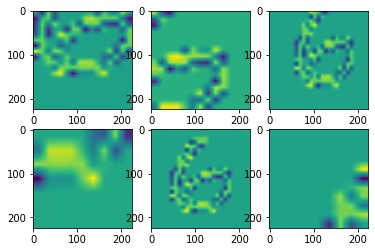

In [61]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(tfm(t(example_data[0,:])))

In [58]:


from timm.data.transforms import RandomResizedCropAndInterpolation
from PIL import Image
from matplotlib import pyplot as plt

tfm = RandomResizedCropAndInterpolation(size=224)




In [37]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [39]:
# timm ResNet50


import timm

resnet = timm.create_model('resnet50', pretrained=True)

class Encoder(nn.Module):
    def __init__(self, model, embedding_dim=2048):
        super().__init__()
        self.model = model
        self.model.fc = nn.Linear(2048, embedding_dim)
    def forward(self, x):
        x = self.model(x)
        return x
    
class Projector(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(),
            nn.Linear(out_features, out_features),
            nn.BatchNorm1d(out_features),
            nn.ReLU(),
            nn.Linear(out_features, out_features)
        )
    
    def forward(self, x):
        return self.fc(x)

In [23]:
conv = nn.Conv2d(1, 3, 1)

In [18]:
conv(example_data).shape

torch.Size([4, 3, 28, 28])

In [59]:
example_data[:, None, :].shape

torch.Size([4, 1, 1, 28, 28])

In [25]:
encoder = Encoder(resnet)

In [28]:
encoded = encoder(conv(example_data))

In [29]:
encoded.shape

torch.Size([4, 2048])

In [40]:
proj = Projector(2048, 8192)

In [43]:
embedding = proj(encoded)

In [ ]:
x = example_data
y_a, y_b = augment(x)

In [ ]:
# for x in loader:

y_a, y_b = augment(x)

z_a = (y_a)
z_b = f(y_b)

z_a_norm = (z_a - z_a.mean(0)) / z_a.std(0)
z_b_norm = (z_b - z_b.mean(0)) / z_b.std(0)

c = torch.mul(z_a_norm.T, z_b_norm)

c_diff = (c - torch.eye(D)).pow(2)

off_diagonal(c_diff).mul_(lambda_)
loss = c_diff.sum()

loss.backward()
opt.step()
